In [13]:
# ساخت جنریتورها (فقط نرمال‌سازی برای تست و ولیدیشن)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20 درصد برای تست
)

# لود کردن داده‌های آموزش
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# لود کردن داده‌های ولیدیشن
validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# نمایش کلاس‌های پیدا شده
print("Class Indices:", train_generator.class_indices)


Found 2296 images belonging to 2 classes.
Found 574 images belonging to 2 classes.
Class Indices: {'no': 0, 'yes': 1}


In [14]:
# دانلود مدل VGG16 بدون لایه‌های آخر (فقط مغز مدل)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# فریز کردن لایه‌های پایه (تا تغییر نکنند)
for layer in base_model.layers:
    layer.trainable = False

# اضافه کردن لایه‌های جدید خودمان
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # برای جلوگیری از حفظ کردن
output = Dense(2, activation='softmax')(x)  # خروجی 2 کلاس (سالم / تومور)

# ساخت مدل نهایی
model = Model(inputs=base_model.input, outputs=output)

# کامپایل مدل
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,269,826 (81.14 MB)

 Trainable params: 6,555,138 (25.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
# مسیر ذخیره مدل
checkpoint_path = "../models/best_brain_model.h5"

# ذخیره بهترین مدل در حین آموزش
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# شروع عملیات آموزش
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8716 - loss: 0.3627
Epoch 1: val_accuracy improved from None to 0.91728, saving model to ../models/best_brain_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8936 - loss: 0.2864 - val_accuracy: 0.9173 - val_loss: 0.1721
Epoch 2/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:41 1s/step - accuracy: 0.8750 - loss: 0.2328

c:\Users\moham\OneDrive\Desktop\Brain_Project\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.91728
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 325ms/step - accuracy: 0.8750 - loss: 0.2328 - val_accuracy: 0.9173 - val_loss: 0.1874
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9285 - loss: 0.1774
Epoch 3: val_accuracy did not improve from 0.91728
71/71 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9284 - loss: 0.1828 - val_accuracy: 0.8842 - val_loss: 0.3028
Epoch 4/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.9062 - loss: 0.2670
Epoch 4: val_accuracy did not improve from 0.91728
71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - accuracy: 0.9062 - loss: 0.2670 - val_accuracy: 0.8897 - val_loss: 0.2714
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9290 - loss: 0.1843
Epoch 5: val_accuracy did not improve from 0.91728
71/71 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9307 - loss: 0.1730 - val_accuracy: 0.9118 - val_loss: 0.1938
Epoch 6/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:41 1s/step - accuracy: 0.9062 - loss

71/71 ━━━━━━━━━━━━━━━━━━━━ 26s 351ms/step - accuracy: 0.9062 - loss: 0.1542 - val_accuracy: 0.9191 - val_loss: 0.1675
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9279 - loss: 0.1864
Epoch 7: val_accuracy improved from 0.91912 to 0.93934, saving model to ../models/best_brain_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9360 - loss: 0.1632 - val_accuracy: 0.9393 - val_loss: 0.1312
Epoch 8/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:39 1s/step - accuracy: 0.9375 - loss: 0.1163
Epoch 8: val_accuracy did not improve from 0.93934
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 328ms/step - accuracy: 0.9375 - loss: 0.1163 - val_accuracy: 0.9338 - val_loss: 0.1474
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9437 - loss: 0.1428
Epoch 9: val_accuracy improved from 0.93934 to 0.94853, saving model to ../models/best_brain_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9483 - loss: 0.1391 - val_accuracy: 0.9485 - val_loss: 0.1211
Epoch 10/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:34 1s/step - accuracy: 0.9688 - loss: 0.1895
Epoch 10: val_accuracy improved from 0.94853 to 0.95404, saving model to ../models/best_brain_model.h5


71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 321ms/step - accuracy: 0.9688 - loss: 0.1895 - val_accuracy: 0.9540 - val_loss: 0.1186
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9464 - loss: 0.1380
Epoch 11: val_accuracy did not improve from 0.95404
71/71 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9461 - loss: 0.1347 - val_accuracy: 0.9449 - val_loss: 0.1219
Epoch 12/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:35 1s/step - accuracy: 1.0000 - loss: 0.0696
Epoch 12: val_accuracy did not improve from 0.95404
71/71 ━━━━━━━━━━━━━━━━━━━━ 26s 354ms/step - accuracy: 1.0000 - loss: 0.0696 - val_accuracy: 0.9504 - val_loss: 0.1230
Epoch 13/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9515 - loss: 0.1300
Epoch 13: val_accuracy did not improve from 0.95404
71/71 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9538 - loss: 0.1329 - val_accuracy: 0.9357 - val_loss: 0.1455
Epoch 14/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:39 1s/step - accuracy: 0.9167 - loss: 0.1982
Epoch 14: val_accuracy did not impro

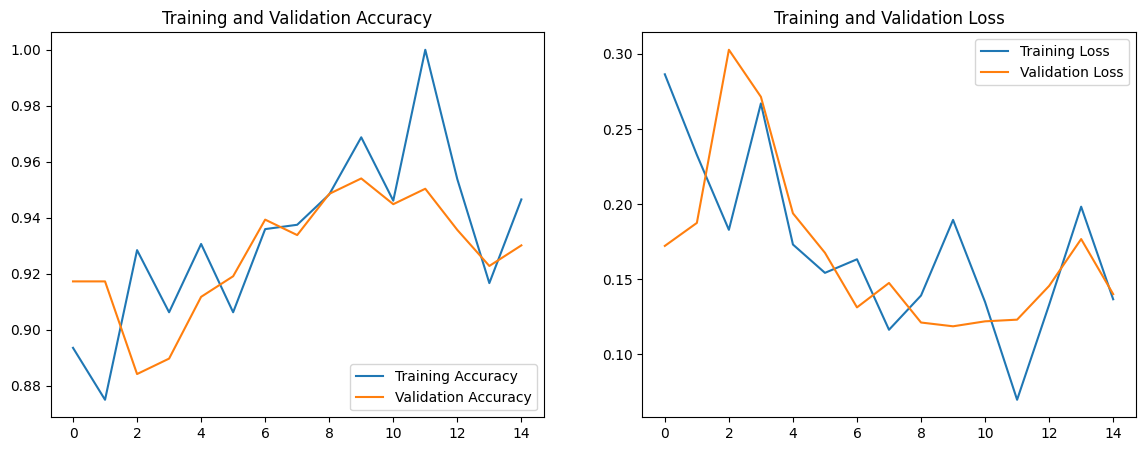

In [16]:
# 6. رسم نمودارهای دقت و خطا (Accuracy & Loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# نمودار دقت
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# نمودار خطا
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [12]:
# تنظیمات اصلی
IMG_HEIGHT = 180
IMG_WIDTH = 180
BATCH_SIZE = 32
EPOCHS = 20  # تعداد دورهای آموزش

# مسیر دیتاست (چون نوت‌بوک توی پوشه است، با .. میریم عقب)
DATA_DIR = '../dataset' 

print(f"Looking for dataset in: {os.path.abspath(DATA_DIR)}")


Looking for dataset in: c:\Users\moham\OneDrive\Desktop\Brain_Project\dataset


In [18]:
%pip install seaborn


     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
     --- --------------------------------- 30.7/294.9 kB 259.2 kB/s eta 0:00:02
     --- --------------------------------- 30.7/294.9 kB 259.2 kB/s eta 0:00:02
     --- --------------------------------- 30.7/294.9 kB 259.2 kB/s eta 0:00:02
     --- --------------------------------- 30.7/294.9 kB 259.2 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/294.9 kB 130.7 kB/s eta 0:00:02
     ------- ----------------------------- 61.4/294.9 kB 172.4 kB/s eta 0:00:02
     -------- ---------------------------- 71.7/294.9 kB 186.7 kB/s eta 0:00:02
     ----------- ------------------------- 92.2/294.9 kB 227.6 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/294.9 kB 227.6 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/294.9 kB 227.6 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/294.9


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------- ------------ 7.8/11.3 MB 172.4 kB/s eta 0:00:21
     -------------------------- ------------ 7.8/11.3 MB 172.4 kB/s eta 0:00:21
     -------------------------- ------------ 7.8/11.3 MB 172.4 kB/s eta 0:00:21
     -------------------------- ------------ 7.8/11.3 MB 172.4 kB/s eta 0:00:21
     -------------------------- ------------ 7.8/11.3 MB 172.4 kB/s eta 0:00:21
     -------------------------- ------------ 7.8/11.3 MB 172.4 kB/s eta 0:00:21
     -------------------------- ------------ 7.8/11.3 MB 172.4 kB/s eta 0:00:21
     -------------------------- ------------ 7.9/11.3 MB 167.3 kB/s eta 0:00:21
     -------------------------- ------------ 7.9/11.3 MB 167.3 kB/s eta 0:00:21
     --------------------------- ----------- 7.9/11.3 MB 167.4 kB/s eta 0:00:21
     --------------------------- ----------- 7.9/11.3 MB 167.4 kB/s eta 0:00:21
     --------------------------- ----------- 7.9/11.3 MB 167.4 kB/s eta 0:00:21
     --------------------------- ------

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

# بررسی وضعیت GPU و نسخه تنسورفلو
print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


TensorFlow Version: 2.20.0
Num GPUs Available:  0


In [10]:
%pip install tensorflow matplotlib scikit-learn


  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl (331.7 MB)
  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached grpcio-1.76.0-cp310-cp310-win_amd64.whl (4.7 MB)
  Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
  Using cached gast-0.7.0-py3-none-any.whl (22 kB)
  Using cached ml_dtypes-0.5.4-cp310-cp310-win_amd64.whl (210 kB)
  Using cached wrapt-2.0.1-cp310-cp310-win_amd64.whl (60 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Using cached protobuf-6.33.2-cp310-abi3-win_amd64.whl (436 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached nump


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import os

print("📍 نوت‌بوک الان اینجاست:")
cwd = os.getcwd()
print(cwd)

print("\n🔍 جستجوی پوشه dataset...")

# بررسی مسیرها
path_option_1 = 'dataset/Testing'
path_option_2 = '../dataset/Testing'
path_option_3 = 'Brain_Project/dataset/Testing'

if os.path.exists(path_option_1):
    print(f"✅ مسیر درست اینه: '{path_option_1}'")
elif os.path.exists(path_option_2):
    print(f"✅ مسیر درست اینه: '{path_option_2}'")
else:
    print("❌ پوشه Testing پیدا نشد! بیایید ببینیم اصلاً پوشه dataset کجاست:")
    
    if os.path.exists('dataset'):
        print("پوشه dataset همینجاست! محتویاتش اینا هستن:")
        print(os.listdir('dataset'))
    elif os.path.exists('../dataset'):
        print("پوشه dataset یک مرحله عقب‌تره. محتویاتش اینا هستن:")
        print(os.listdir('../dataset'))
    else:
        print("😱 اصلاً پوشه dataset رو پیدا نکردم. لیست فایل‌های اینجا:")
        print(os.listdir())


📍 نوت‌بوک الان اینجاست:
c:\Users\moham\OneDrive\Desktop\Brain_Project\notebooks

🔍 جستجوی پوشه dataset...
❌ پوشه Testing پیدا نشد! بیایید ببینیم اصلاً پوشه dataset کجاست:
پوشه dataset یک مرحله عقب‌تره. محتویاتش اینا هستن:
['no', 'yes']


🚀 شروع ساخت ماتریس گیجی...
Found 2870 images belonging to 2 classes.
⏳ در حال پیش‌بینی روی تصاویر...
90/90 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step
📊 در حال رسم نمودار...


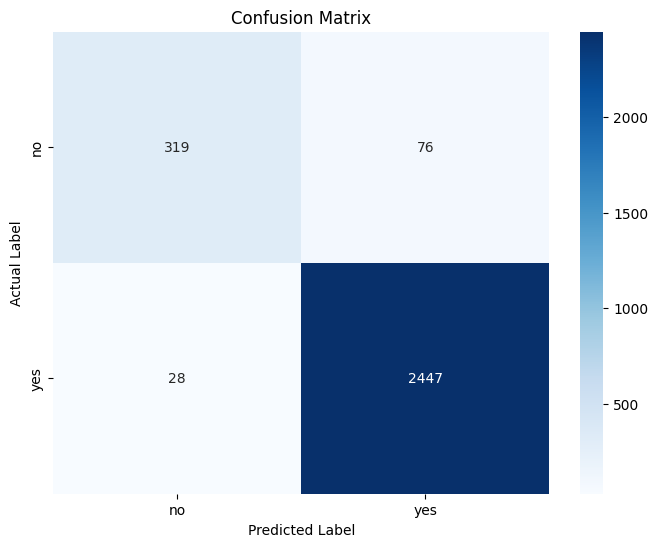

Classification Report
              precision    recall  f1-score   support

          no       0.92      0.81      0.86       395
         yes       0.97      0.99      0.98      2475

    accuracy                           0.96      2870
   macro avg       0.94      0.90      0.92      2870
weighted avg       0.96      0.96      0.96      2870



In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("🚀 شروع ساخت ماتریس گیجی...")

# تنظیم داده‌ها
test_datagen = ImageDataGenerator(rescale=1./255)

# آدرس اصلاح شده بر اساس خروجی تست شما
# چون پوشه Testing نداریم، مستقیم به dataset اشاره می‌کنیم
test_generator = test_datagen.flow_from_directory(
    '../dataset',   # 👈 تغییر اصلی اینجاست (Testing حذف شد)
    target_size=(180, 180), # ⚠️ نکته: اگر با خطا مواجه شدی، این رو بکن (180, 180)
    batch_size=32,
    class_mode='categorical',
    shuffle=False) # برای ماتریس گیجی بسیار مهمه که شافل خاموش باشه

# پیش‌بینی مدل
print("⏳ در حال پیش‌بینی روی تصاویر...")
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# رسم ماتریس
print("📊 در حال رسم نمودار...")
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# گزارش متنی
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))
